In [1]:
import sklearn.model_selection
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
from math import floor
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_X_y, check_array
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# root = '/content/drive'
# drive.mount(root)

# Load data

In [2]:
# excel = pd.read_csv(f'{root}/My Drive/TA/HRDataset_v14.csv')
excel = pd.read_csv(f'./HRDataset_v14.csv')
excel = pd.DataFrame(excel)
excel.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
# Check all columns
excel.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [4]:
excel.shape

(311, 36)

# Data preprocessing

In [5]:
excel = excel.drop([
    'Employee_Name',
    'EmpID',
    'Position',
    'Sex',
    'MaritalDesc',
    'TermReason',
    'EmploymentStatus',
    'Department',
    'ManagerName',
    'PerformanceScore',
  ], axis=1)
excel.head(5)

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,DateofHire,DateofTermination,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,0,1,1,5,4,0,62506,0,19,...,7/5/2011,NaN,22.0,LinkedIn,4.60,5,0,1/17/2019,0,1
1,1,1,1,5,3,3,0,104437,1,27,...,3/30/2015,6/16/2016,4.0,Indeed,4.96,3,6,2/24/2016,0,17
2,1,1,0,5,5,3,0,64955,1,20,...,7/5/2011,9/24/2012,20.0,LinkedIn,3.02,3,0,5/15/2012,0,3
3,1,1,0,1,5,3,0,64991,0,19,...,1/7/2008,NaN,16.0,Indeed,4.84,5,0,1/3/2019,0,15
4,0,2,0,5,5,3,0,50825,1,19,...,7/11/2011,9/6/2016,39.0,Google Search,5.00,4,0,2/1/2016,0,2


In [6]:
excel.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'State', 'Zip', 'DOB', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'DateofHire', 'DateofTermination', 'ManagerID',
       'RecruitmentSource', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [7]:
excel.describe()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [8]:
excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MarriedID                   311 non-null    int64  
 1   MaritalStatusID             311 non-null    int64  
 2   GenderID                    311 non-null    int64  
 3   EmpStatusID                 311 non-null    int64  
 4   DeptID                      311 non-null    int64  
 5   PerfScoreID                 311 non-null    int64  
 6   FromDiversityJobFairID      311 non-null    int64  
 7   Salary                      311 non-null    int64  
 8   Termd                       311 non-null    int64  
 9   PositionID                  311 non-null    int64  
 10  State                       311 non-null    object 
 11  Zip                         311 non-null    int64  
 12  DOB                         311 non-null    object 
 13  CitizenDesc                 311 non

## Generate the Age of Employee's

In [9]:
excel['Age'] = excel.apply(
    lambda row: 2021 - (
        datetime.strptime(row['DOB'], '%m/%d/%y').replace(
            year=datetime.strptime(row['DOB'], '%m/%d/%y').year - 100
        ) if datetime.strptime(row['DOB'], '%m/%d/%y').year > 2010 else datetime.strptime(row['DOB'], '%m/%d/%y')
    ).year,
    axis=1
)

In [10]:
excel.Age.describe()

count    311.000000
mean      42.408360
std        8.870236
min       29.000000
25%       35.000000
50%       41.000000
75%       48.000000
max       70.000000
Name: Age, dtype: float64

In [11]:
excel = excel.drop('DOB', axis=1)

## Create the difference on Date of Hire and Last Performance Review

In [12]:
reference_date = datetime(2021, 4, 1)

excel['DateofHire'] = pd.to_datetime(excel['DateofHire'])
excel['DateofTermination'] = pd.to_datetime(excel['DateofTermination'])
excel['LastPerformanceReview_Date'] = pd.to_datetime(excel['LastPerformanceReview_Date'])
excel['DateofTermination'] = excel['DateofTermination'].fillna(reference_date)

excel['MonthsWorking'] = (excel['DateofTermination'] - excel['DateofHire']).dt.days / 30
excel['MonthsWorking'] = (excel['MonthsWorking']).astype(int)

excel['MonthsSinceLastPerformanceReview'] = (excel['DateofTermination'] - excel['LastPerformanceReview_Date']).dt.days / 30
excel['MonthsSinceLastPerformanceReview'] = (excel['MonthsSinceLastPerformanceReview']).astype(int)

In [13]:
excel.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,MonthsWorking,MonthsSinceLastPerformanceReview
0,0,0,1,1,5,4,0,62506,0,19,...,LinkedIn,4.60,5,0,2019-01-17,0,1,38,118,26
1,1,1,1,5,3,3,0,104437,1,27,...,Indeed,4.96,3,6,2016-02-24,0,17,46,14,3
2,1,1,0,5,5,3,0,64955,1,20,...,LinkedIn,3.02,3,0,2012-05-15,0,3,33,14,4
3,1,1,0,1,5,3,0,64991,0,19,...,Indeed,4.84,5,0,2019-01-03,0,15,33,161,27
4,0,2,0,5,5,3,0,50825,1,19,...,Google Search,5.00,4,0,2016-02-01,0,2,32,62,7


In [14]:
excel['DateofHire'].info

<bound method Series.info of 0     2011-07-05
1     2015-03-30
2     2011-07-05
3     2008-01-07
4     2011-07-11
         ...    
306   2014-07-07
307   2008-09-02
308   2010-04-10
309   2015-03-30
310   2014-09-29
Name: DateofHire, Length: 311, dtype: datetime64[ns]>

In [15]:
excel['DateofTermination'].info

<bound method Series.info of 0     2021-04-01
1     2016-06-16
2     2012-09-24
3     2021-04-01
4     2016-09-06
         ...    
306   2021-04-01
307   2015-09-29
308   2021-04-01
309   2021-04-01
310   2021-04-01
Name: DateofTermination, Length: 311, dtype: datetime64[ns]>

In [16]:
excel = excel.drop(['LastPerformanceReview_Date', 'DateofHire', 'DateofTermination', 'EmpStatusID', 'MonthsSinceLastPerformanceReview'], axis=1)

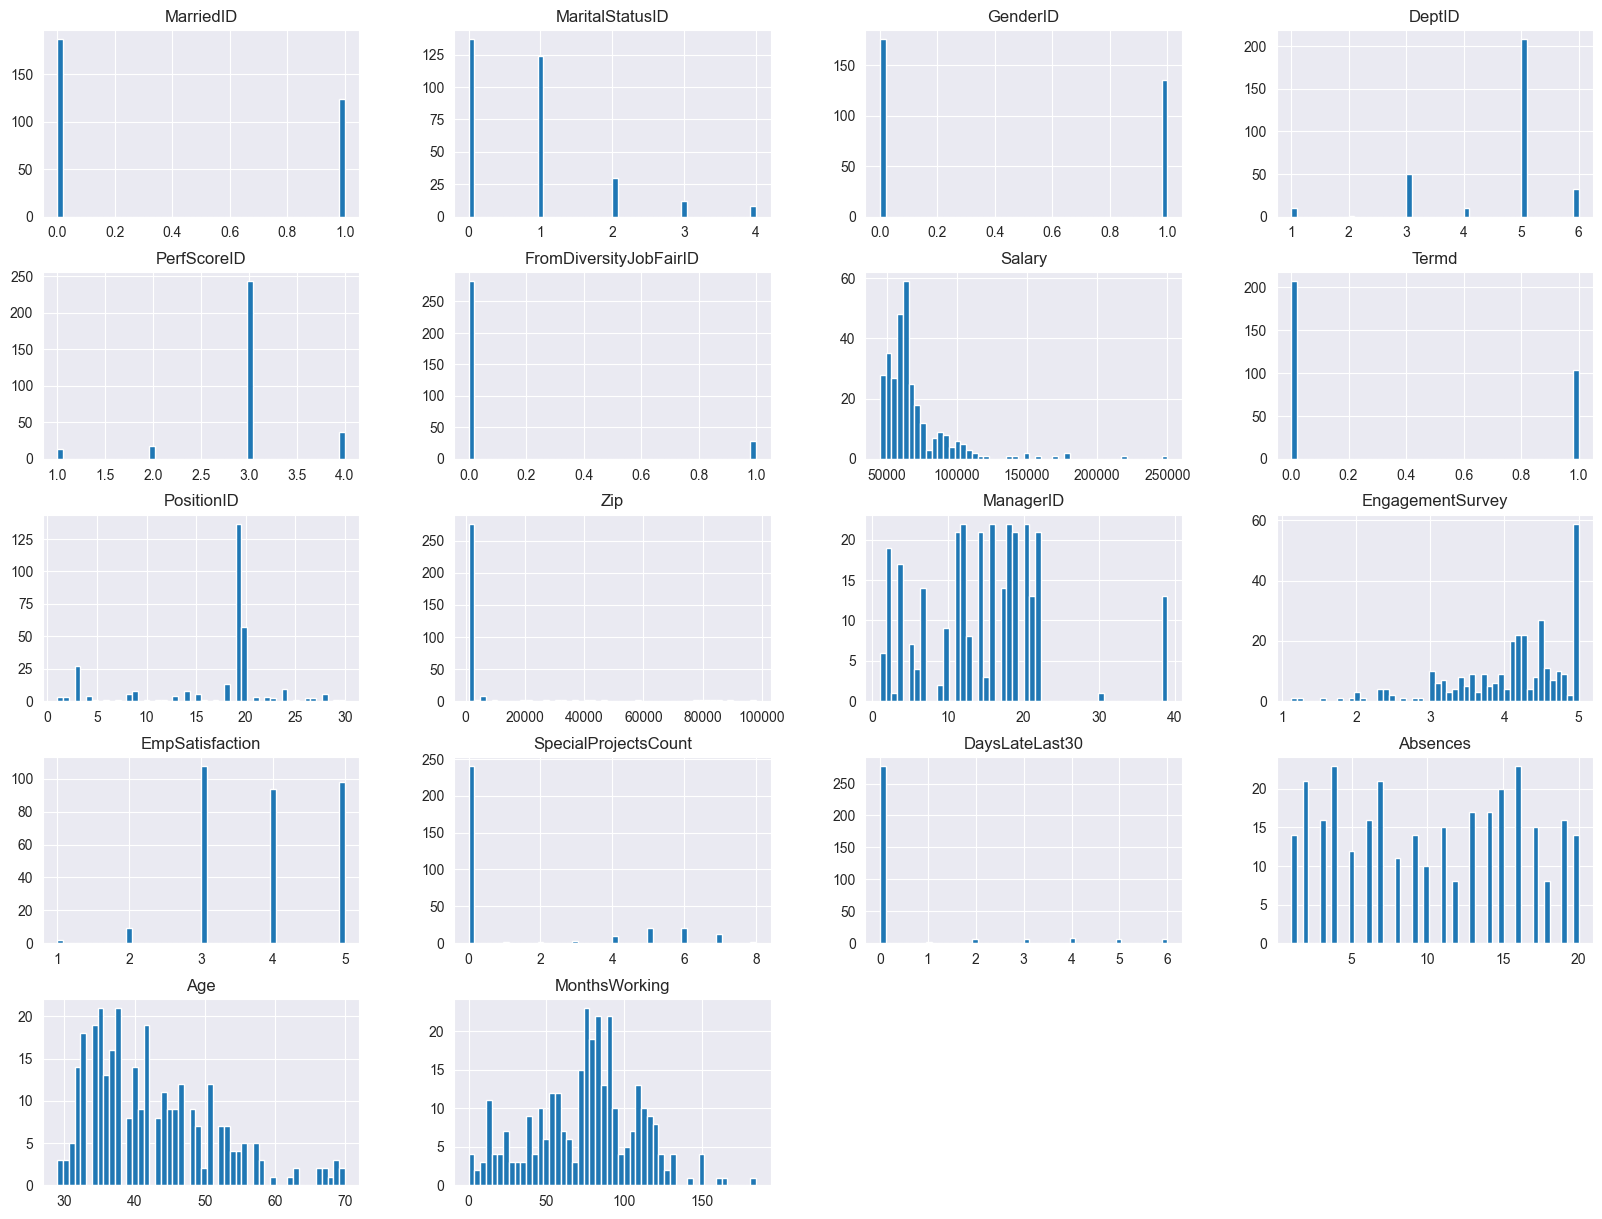

In [21]:
%matplotlib inline
excel.hist(bins=50, figsize=(20, 15))
plt.show()

In [18]:
excel.describe()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,MonthsWorking
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942,42.408360,75.176849
std,0.490423,0.943239,0.496435,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596,8.870236,33.786678
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000,29.000000,0.000000
25%,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000,35.000000,54.000000
50%,0.000000,1.000000,0.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000,41.000000,79.000000
75%,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000,48.000000,94.000000
max,1.000000,4.000000,1.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000,70.000000,185.000000


# Handling Text and Categorical Attributes

In [19]:
excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MarriedID               311 non-null    int64  
 1   MaritalStatusID         311 non-null    int64  
 2   GenderID                311 non-null    int64  
 3   DeptID                  311 non-null    int64  
 4   PerfScoreID             311 non-null    int64  
 5   FromDiversityJobFairID  311 non-null    int64  
 6   Salary                  311 non-null    int64  
 7   Termd                   311 non-null    int64  
 8   PositionID              311 non-null    int64  
 9   State                   311 non-null    object 
 10  Zip                     311 non-null    int64  
 11  CitizenDesc             311 non-null    object 
 12  HispanicLatino          311 non-null    object 
 13  RaceDesc                311 non-null    object 
 14  ManagerID               303 non-null    fl

In [22]:
categorical = [
    'State',
    'CitizenDesc',
    'HispanicLatino',
    'RaceDesc',
    'RecruitmentSource'
]
for x in categorical:
    if excel[x].dtype == 'object':
        encoder = OrdinalEncoder()
        excel[[x]] = encoder.fit_transform(excel[[x]])

In [23]:
# Checking shape of dataset
excel.shape

(311, 23)

In [24]:
excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MarriedID               311 non-null    int64  
 1   MaritalStatusID         311 non-null    int64  
 2   GenderID                311 non-null    int64  
 3   DeptID                  311 non-null    int64  
 4   PerfScoreID             311 non-null    int64  
 5   FromDiversityJobFairID  311 non-null    int64  
 6   Salary                  311 non-null    int64  
 7   Termd                   311 non-null    int64  
 8   PositionID              311 non-null    int64  
 9   State                   311 non-null    float64
 10  Zip                     311 non-null    int64  
 11  CitizenDesc             311 non-null    float64
 12  HispanicLatino          311 non-null    float64
 13  RaceDesc                311 non-null    float64
 14  ManagerID               303 non-null    fl

In [25]:
excel.head(5)

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,State,...,RaceDesc,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,MonthsWorking
0,0,0,1,5,4,0,62506,0,19,10.0,...,5.0,22.0,5.0,4.60,5,0,0,1,38,118
1,1,1,1,3,3,0,104437,1,27,10.0,...,5.0,4.0,4.0,4.96,3,6,0,17,46,14
2,1,1,0,5,3,0,64955,1,20,10.0,...,5.0,20.0,5.0,3.02,3,0,0,3,33,14
3,1,1,0,5,3,0,64991,0,19,10.0,...,5.0,16.0,4.0,4.84,5,0,0,15,33,161
4,0,2,0,5,3,0,50825,1,19,10.0,...,5.0,39.0,3.0,5.00,4,0,0,2,32,62


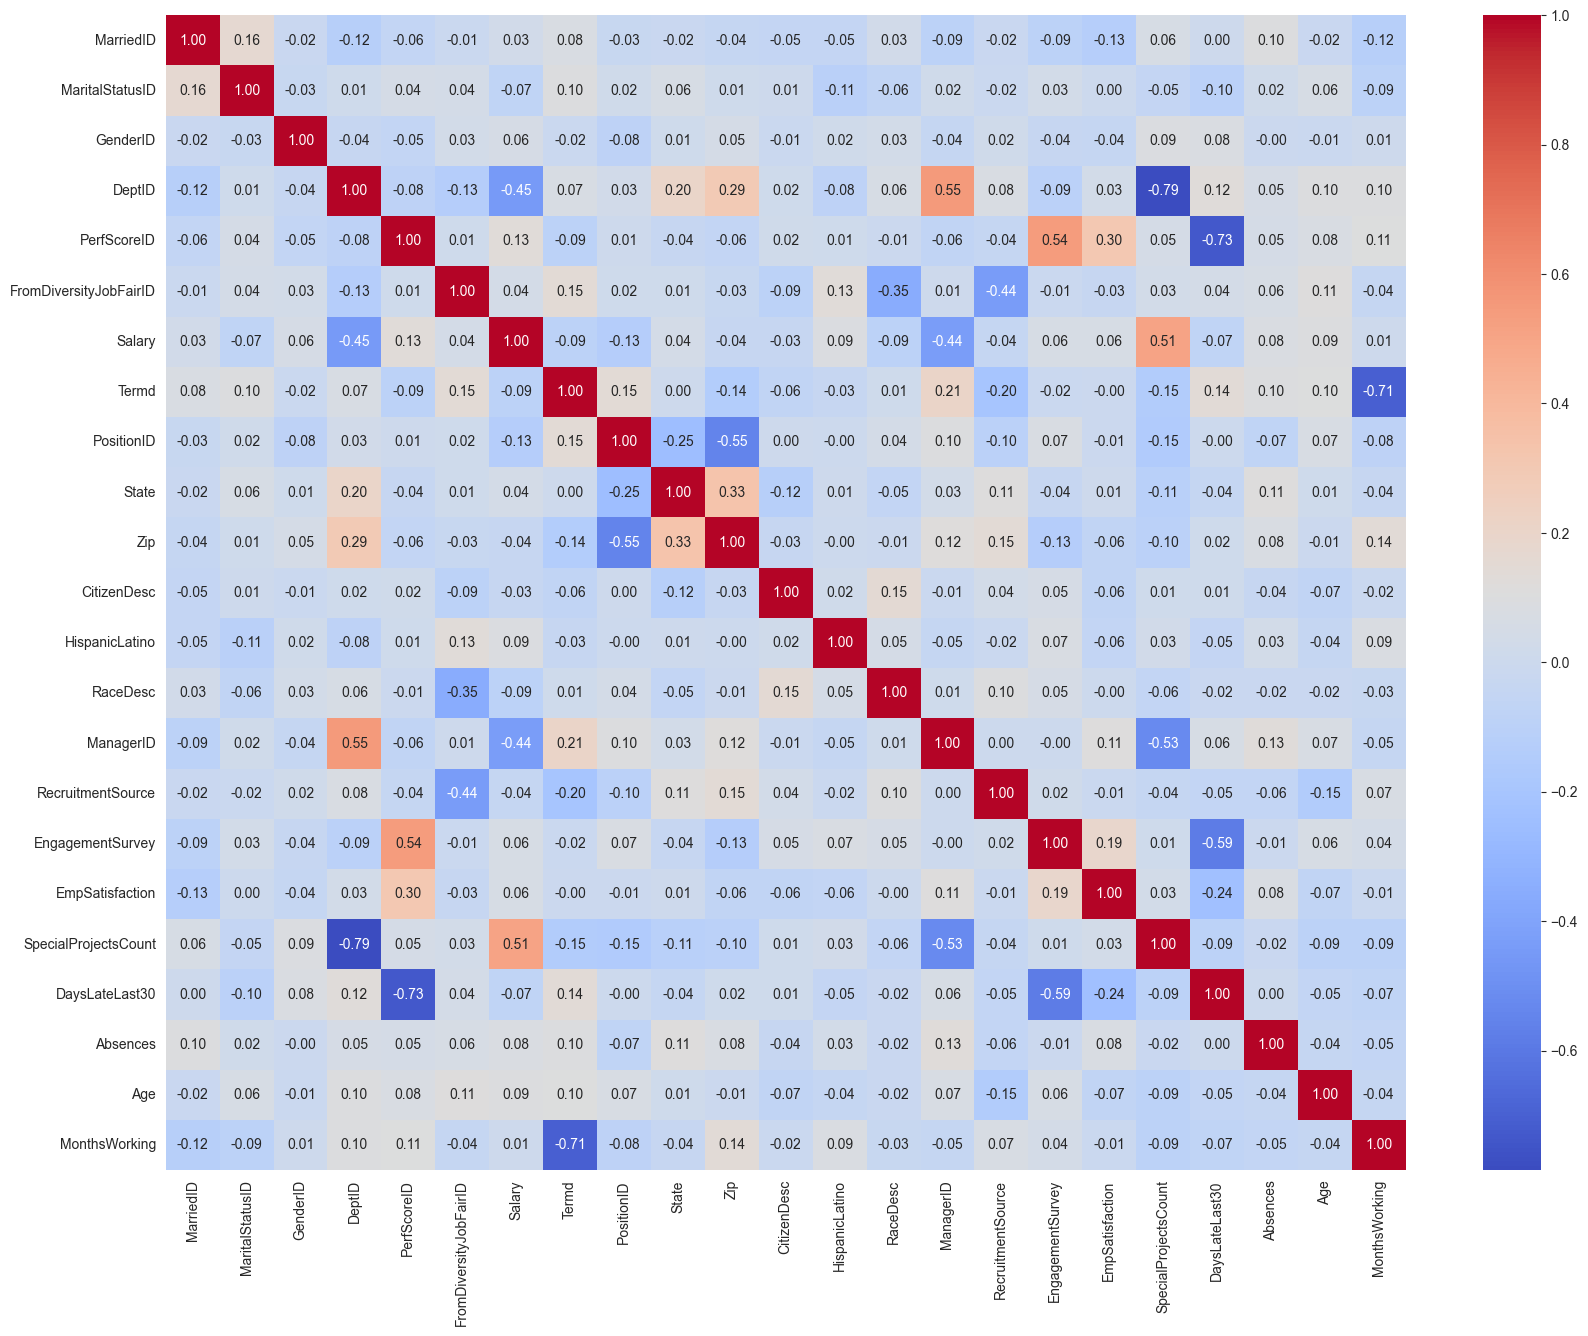

In [26]:
plt.figure(figsize=(20, 15))
data_correlation = excel.corr()
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

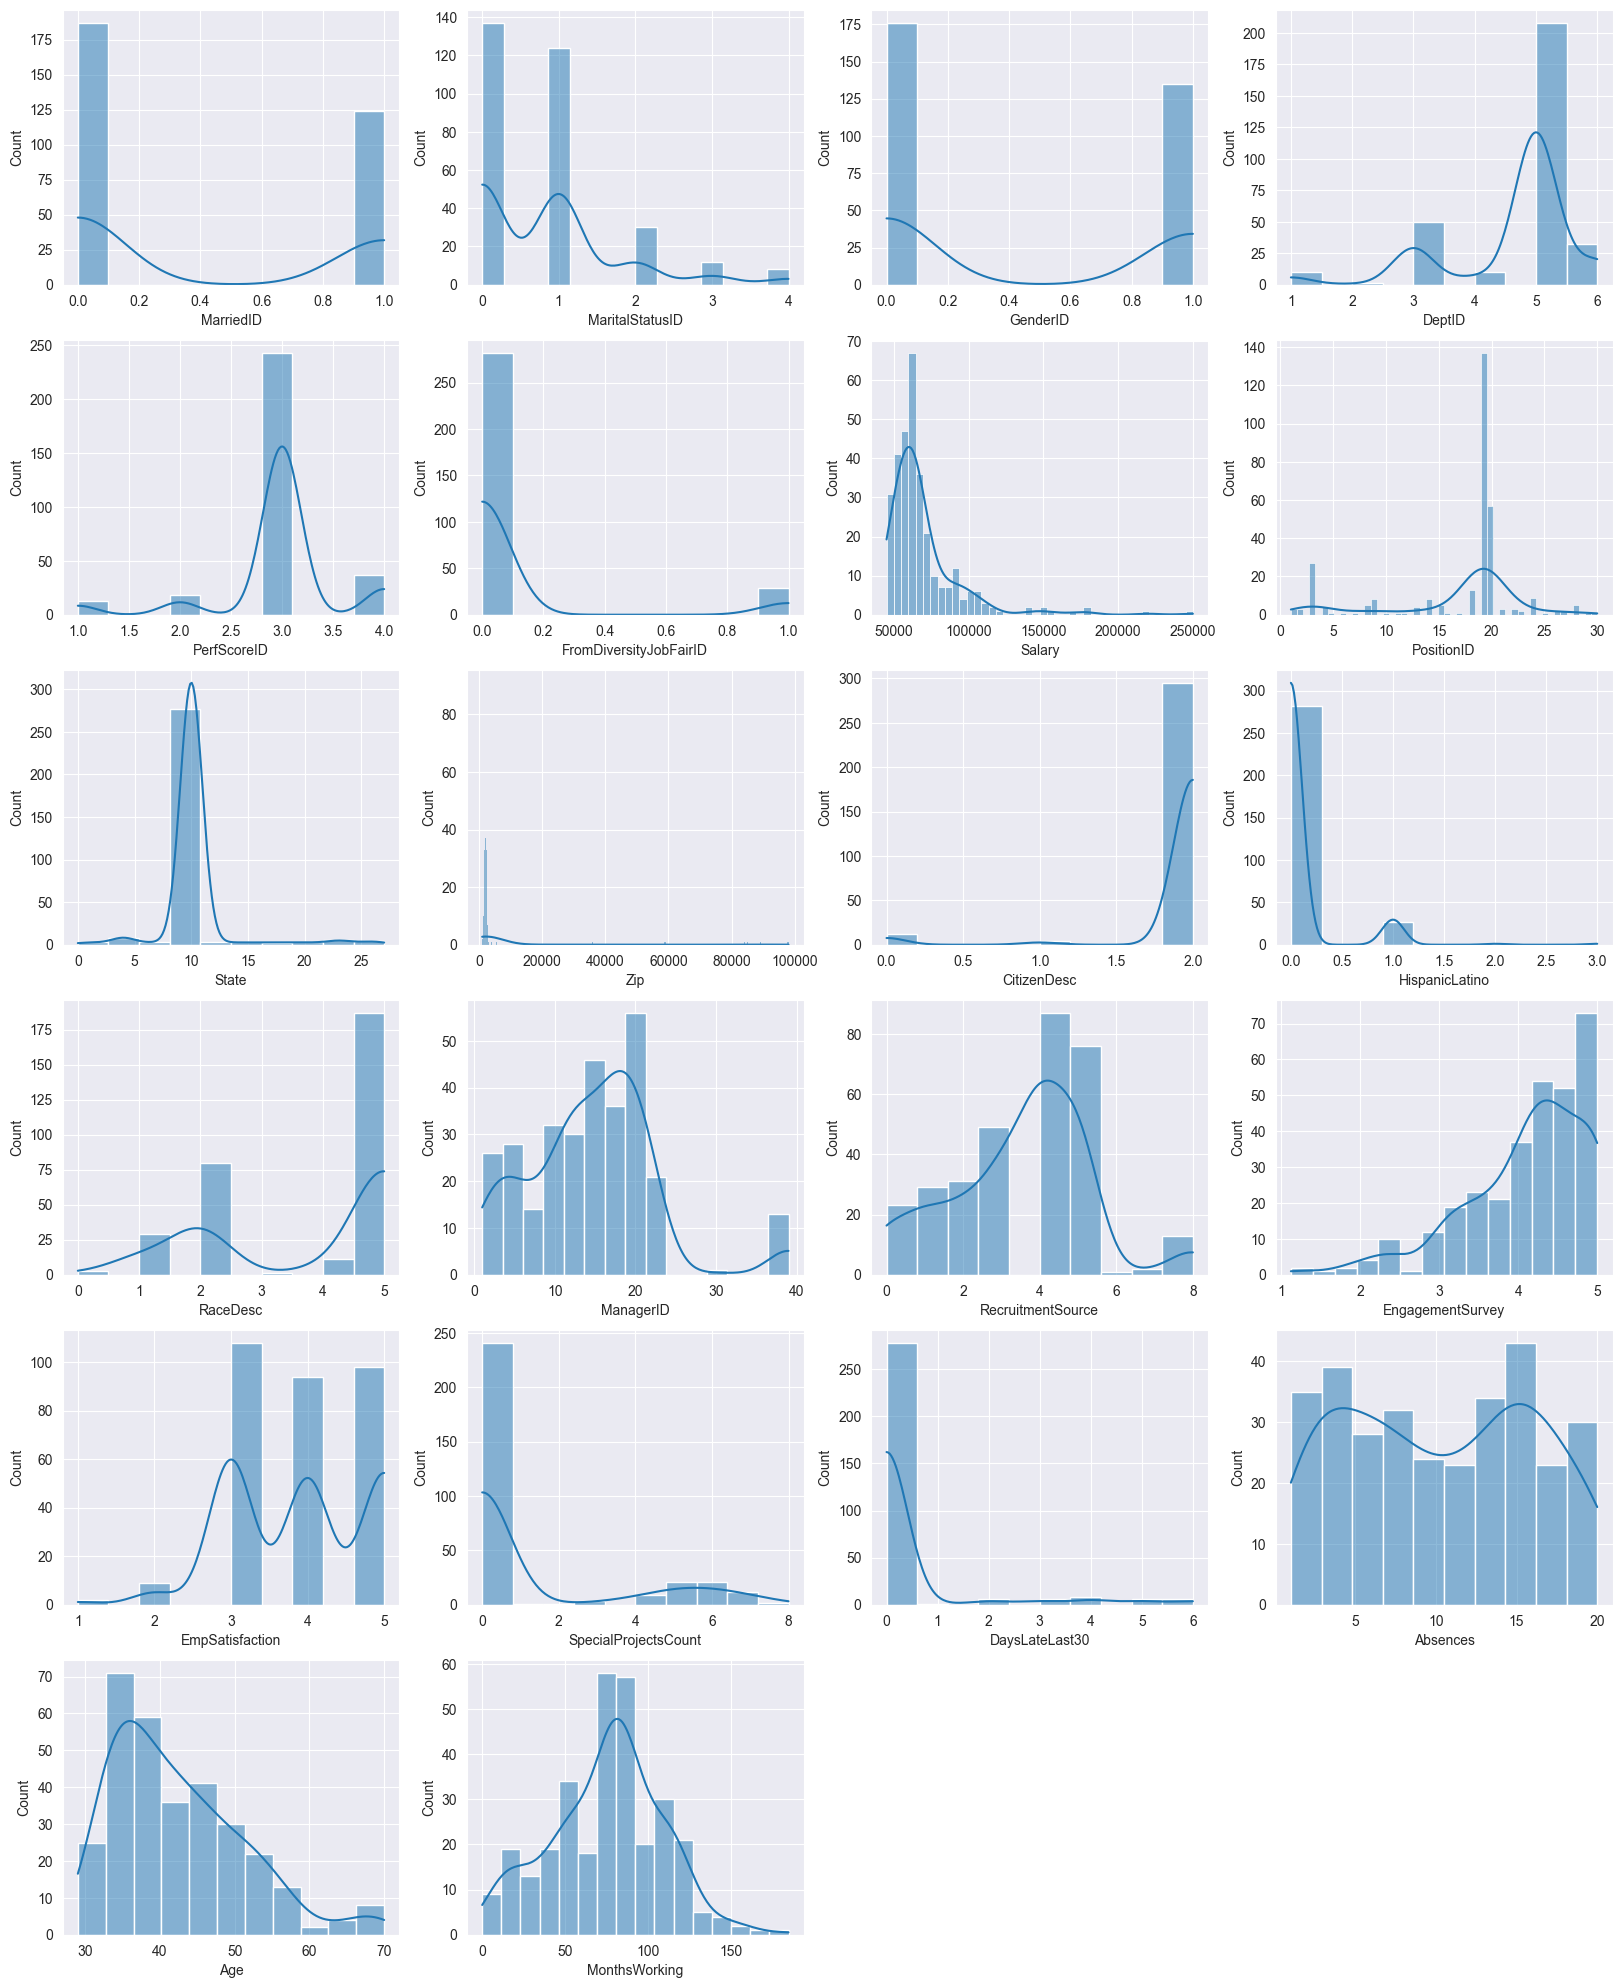

In [35]:
features = [feature for feature in excel.columns if feature != 'Termd']

rows = 6
cols = 4
plt.figure(figsize=(20, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=excel, x=feature, kde=True, palette='muted', multiple='stack')
    # plt.title(feature)

# Data processing

In [54]:
random_state = 2

In [37]:
X = excel.drop('Termd', axis=1)
y = excel['Termd']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

In [63]:
parameters = {
    'objective':'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'seed': random_state
}

model1 = xgboost.train(parameters, dtrain, num_boost_round=100)

In [64]:
y_pred = model1.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]

In [65]:
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 93.65%


In [66]:
recall = recall_score(y_test, y_pred_binary)
print("Recall: %.2f%%" % (recall * 100.0))

Recall: 85.71%


In [67]:
precision = precision_score(y_test, y_pred_binary)
print("Precision: %.2f%%" % (precision * 100.0))

Precision: 94.74%


In [68]:
f1= f1_score(y_test, y_pred_binary)
print("F1 Scores: %.2f%%" % (f1 * 100.0))

F1 Scores: 90.00%


# Data Processing With 5 Fold Validation

In [71]:
xgb_classifier = XGBClassifier(
    **parameters
)

In [72]:
cvvv = StratifiedKFold(n_splits=5, shuffle=True)
# cv_results = xgboost.cv(
#     parameters,
#     dtrain,
#     nfold=5,
#     metrics={'error'},
#     callbacks=[
#         xgboost.callback.EvaluationMonitor(show_stdv=True),
#         xgboost.callback.EarlyStopping(3)
#     ],
#     stratified=True
# )

In [73]:
# List untuk menyimpan hasil metrik dari tiap fold
accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

# Cross-validation manual
for train_idx, val_idx in cvvv.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    # Train model di fold ini
    xgb_classifier.fit(X_train_fold, y_train_fold)
    
    # Prediksi
    y_pred_fold = xgb_classifier.predict(X_val_fold)
    
    # Simpan metrik
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
    precision_scores.append(precision_score(y_val_fold, y_pred_fold, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred_fold, average='weighted'))

In [74]:
# Ambil rata-rata dari tiap metrik
accuracy = np.mean(accuracy_scores)
precision = np.mean(precision_scores)
recall = np.mean(recall_scores)
f1 = np.mean(f1_scores)

# Menampilkan hasil
print(f"Accuracy: %.2f%%" % (accuracy * 100.0))
print(f"Precision: %.2f%%" % (precision * 100.0))
print(f"Recall: %.2f%%" % (recall * 100.0))
print(f"F1 Score: %.2f%%" % (f1 * 100.0))

Accuracy: 92.28%
Precision: 92.33%
Recall: 92.28%
F1 Score: 92.24%


<Figure size 2000x1500 with 0 Axes>

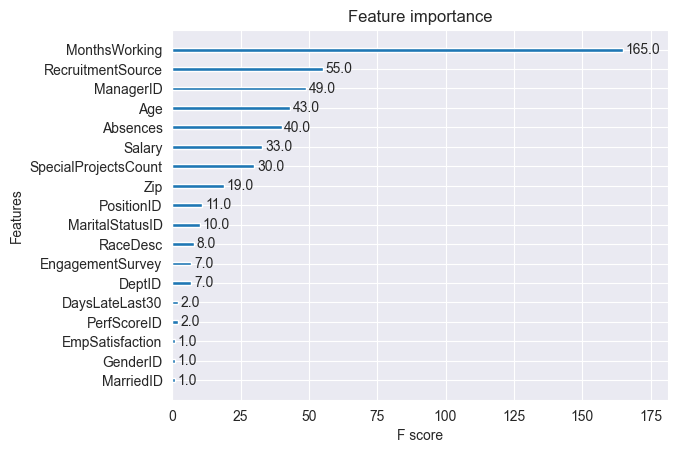

In [75]:
plt.figure(figsize=(20, 15))
xgboost.plot_importance(xgb_classifier)
plt.show()